In [4]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

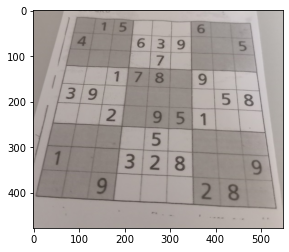

In [5]:
imframe = Image.open('sudoku.jpg')
plt.imshow(imframe)

In [46]:
#convertim a numpy de 3D (files, columnes, codiRGB)
corners=[[97,16],[476,29],[6,408],[531,433]] #superior Izda, Sup D, Inf I, Inf D
rango=[9,90] #posiciones X, posiciones Y
test1=[[391,59],[194,255],[347,129]] #7_1, 3_6  , 6_3

In [47]:
v1=[corners[1][0]-corners[0][0],corners[1][1]-corners[0][1]]
v2=[corners[2][0]-corners[0][0],corners[2][1]-corners[0][1]]
v3=[corners[3][0]-corners[2][0],corners[3][1]-corners[2][1]]
v4=[corners[3][0]-corners[1][0],corners[3][1]-corners[1][1]]
v5=[(v3[0]-v1[0])/rango[0],(v3[1]-v1[1])/rango[0]]
v6=[(v4[0]-v2[0])/rango[1],(v4[1]-v2[1])/rango[1]]
v6


[1.6222222222222222, 0.13333333333333333]

In [48]:
for t in test1:
    print(t)
    Ax=-(v1[0]/rango[0])*v5[1]+v5[0]*v1[1]/rango[0]
    Cx=(t[0]-corners[0][0])*v2[1]-v2[0]*(t[1]-corners[0][1])
    Bx=(t[0]-corners[0][0])*v5[1]-(v1[0]/rango[0])*v2[1]+v2[0]*v1[1]/rango[0]-(t[1]-corners[0][1])*v5[0]
    SolX=np.roots([Ax,Bx,Cx])
    Ay=-(v2[0]/rango[1])*v6[1]+v6[0]*v2[1]/rango[1]
    Cy=(t[0]-corners[0][0])*v1[1]-v1[0]*(t[1]-corners[0][1])
    By=(t[0]-corners[0][0])*v6[1]-(v2[0]/rango[1])*v1[1]+v1[0]*v2[1]/rango[1]-(t[1]-corners[0][1])*v6[0]
    SolY=np.roots([Ay,By,Cy])
    print(str(SolX[1])+"_"+str(SolY[1]))

[391, 59]
6.939428790175597_7.396523951369133
[194, 255]
2.918282553858132_53.37484547831494
[347, 129]
5.906767347015775_23.51260775488509


In [43]:
Ay=-(v2[0]/rango[1])*v6[1]+v6[0]*v2[1]/rango[1]
Cy=(t[0]-corners[0][0])*v1[1]-v1[0]*(t[1]-corners[0][1])
By=(t[0]-corners[0][0])*v6[1]-(v2[0]/rango[1])*v1[1]+v1[0]*v2[1]/rango[1]-(t[1]-corners[0][1])*v6[0]
np.roots([Ay,By,Cy])

array([-46.75303249,   4.70252155])

In [22]:
np3D.shape #amb això veim el nombre de files i de columnes, el codi RGB sempre es 3

(110, 110, 3)

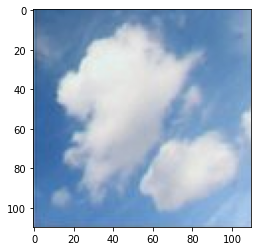

In [23]:
#Recuperam Imatge (dtype ha de ser uint8)
im2=Image.fromarray(np3D)
plt.imshow(im2)

In [24]:
#convertim a numpy de 2D (pixels, codiRGB)
npframe = np.array(imframe.getdata())
#i ara a dataframe
imgrgbdf = pd.DataFrame(npframe)
imgrgbdf=imgrgbdf.rename(columns={0:"R",1:"G",2:"B"})
imgrgbdf #una fila per pixel, la imatge és de 110x100 pixels

,R,G,B
0,92,127,159
1,47,89,129
2,66,100,137
3,66,100,138
4,59,102,145
...,...,...,...
12095,171,198,228
12096,168,194,227
12097,166,192,227
12098,168,192,226


In [26]:
#reconvertim a array de numpy
npRecuperat=imgrgbdf.to_numpy()
npRecuperat.shape

(12100, 3)

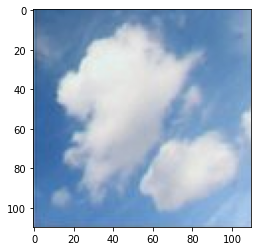

In [27]:
# tornam a passar a files i columnes
npframe=npframe.reshape(110,110,3)
#reconvertim a imatge
im3=Image.fromarray(npframe.astype(np.uint8))
plt.imshow(im3)
